In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score

In [2]:
data=pd.read_csv('glass.csv')

In [3]:
data

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


In [4]:
len(data)

214

In [7]:
data.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


In [40]:
#Replace_Zeroes
zero_not_accepted =['Mg','K','Ba','Fe']
for column in zero_not_accepted:
    data[column]=data[column].replace(0,np.NaN)
    mean=int(data[column].mean(skipna=True))
  

In [41]:
data

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,NaN,NaN,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,NaN,NaN,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,NaN,NaN,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,NaN,NaN,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,NaN,NaN,1
...,...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,3.00,2.88,72.61,0.08,9.18,1.06,NaN,7
210,1.51685,14.92,3.00,1.99,73.06,NaN,8.40,1.59,NaN,7
211,1.52065,14.36,3.00,2.02,73.42,NaN,8.44,1.64,NaN,7
212,1.51651,14.38,3.00,1.94,73.61,NaN,8.48,1.57,NaN,7


In [42]:
mean=data['Mg'].mean()
mean

3.2733177570093464

In [43]:
data['Mg']=data['Mg'].fillna(mean)

In [44]:
data['Mg'].describe()

count    214.000000
mean       3.273318
std        0.575175
min        0.330000
25%        3.000000
50%        3.480000
75%        3.600000
max        4.490000
Name: Mg, dtype: float64

In [45]:
mean=data['K'].mean()
mean

0.5780978260869564

In [46]:
data['K']=data['K'].fillna(mean)

In [47]:
mean=data['Ba'].mean()
mean

0.9857894736842105

In [48]:
data['Ba']=data['Ba'].fillna(mean)

In [49]:
mean=data['Fe'].mean()
mean

0.17428571428571424

In [50]:
data['Fe']=data['Fe'].fillna(mean)

In [51]:
data

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.060000,8.75,0.985789,0.174286,1
1,1.51761,13.89,3.60,1.36,72.73,0.480000,7.83,0.985789,0.174286,1
2,1.51618,13.53,3.55,1.54,72.99,0.390000,7.78,0.985789,0.174286,1
3,1.51766,13.21,3.69,1.29,72.61,0.570000,8.22,0.985789,0.174286,1
4,1.51742,13.27,3.62,1.24,73.08,0.550000,8.07,0.985789,0.174286,1
...,...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,3.00,2.88,72.61,0.080000,9.18,1.060000,0.174286,7
210,1.51685,14.92,3.00,1.99,73.06,0.578098,8.40,1.590000,0.174286,7
211,1.52065,14.36,3.00,2.02,73.42,0.578098,8.44,1.640000,0.174286,7
212,1.51651,14.38,3.00,1.94,73.61,0.578098,8.48,1.570000,0.174286,7


In [69]:
array = data.values
X=array[:,0:9]
Y=array[:,9]


In [67]:
X.shape

(214, 9)

In [71]:
Y.shape

(214,)

In [72]:
scaler=StandardScaler()

scaler.fit(X)
X = scaler.transform(X)

In [74]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=10)

In [77]:
int(np.sqrt(len(X_train)))

13

In [78]:
model_KNN=KNeighborsClassifier(n_neighbors=int(np.sqrt(len(X_train))),
                              metric='euclidean')

In [79]:
model_KNN.fit(X_train,Y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=13)

In [80]:
X_test

array([[ 3.21668863e-01,  2.84953261e-01,  4.64741385e-01,
        -1.39510958e+00, -1.20944523e-03, -6.75508392e-01,
        -4.71626023e-02, -2.58975816e+00,  1.24992530e+00],
       [ 2.46156264e-02, -1.93754452e-01,  8.48130633e-01,
        -2.50765108e-01, -3.24736045e-01,  3.07328659e-03,
        -3.78189437e-01, -3.44011168e-16,  0.00000000e+00],
       [ 2.10728887e+00, -2.40317467e+00, -4.76304951e-01,
         8.73503150e-01, -5.96498389e-01,  3.74677539e-01,
         3.01659640e+00, -3.44011168e-16,  3.15198554e+00],
       [-5.49687297e-01, -2.06029009e-01,  5.17021737e-01,
        -1.30307795e-01,  6.34958747e-02, -2.92401267e-02,
        -3.64103189e-01, -3.44011168e-16, -1.41295904e+00],
       [ 1.52968536e+00, -1.20107111e-01,  5.34448521e-01,
        -1.25457605e+00, -8.55319668e-01, -7.40135218e-01,
         8.54357288e-01, -3.44011168e-16, -2.74440121e+00],
       [ 8.06855816e-01,  4.56797056e-01, -1.73103340e+00,
        -2.99267001e-02, -8.55319668e-01, -1.423370

In [82]:
Y_pred=model_KNN.predict(X_test)
print(list(zip(Y_test,Y_pred)))

[(3.0, 2.0), (2.0, 2.0), (2.0, 5.0), (3.0, 2.0), (1.0, 1.0), (2.0, 6.0), (1.0, 1.0), (5.0, 5.0), (1.0, 1.0), (3.0, 1.0), (1.0, 1.0), (2.0, 6.0), (1.0, 1.0), (7.0, 7.0), (1.0, 1.0), (2.0, 2.0), (6.0, 7.0), (3.0, 1.0), (1.0, 2.0), (2.0, 5.0), (1.0, 2.0), (2.0, 2.0), (6.0, 1.0), (2.0, 2.0), (2.0, 2.0), (5.0, 2.0), (2.0, 2.0), (1.0, 1.0), (1.0, 1.0), (5.0, 2.0), (1.0, 1.0), (1.0, 1.0), (2.0, 2.0), (2.0, 6.0), (1.0, 1.0), (7.0, 7.0), (1.0, 2.0), (7.0, 7.0), (2.0, 2.0), (7.0, 1.0), (1.0, 2.0), (1.0, 2.0), (1.0, 1.0)]


In [86]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

cfm=confusion_matrix(Y_test,Y_pred)
print(cfm)

print("Classification report:")

print(classification_report(Y_test,Y_pred))

acc=accuracy_score(Y_test,Y_pred)
print("Accuracy of the model: ",acc)

[[12  5  0  0  0  0]
 [ 0  8  0  2  3  0]
 [ 2  2  0  0  0  0]
 [ 0  2  0  1  0  0]
 [ 1  0  0  0  0  1]
 [ 1  0  0  0  0  3]]
Classification report:
              precision    recall  f1-score   support

         1.0       0.75      0.71      0.73        17
         2.0       0.47      0.62      0.53        13
         3.0       0.00      0.00      0.00         4
         5.0       0.33      0.33      0.33         3
         6.0       0.00      0.00      0.00         2
         7.0       0.75      0.75      0.75         4

    accuracy                           0.56        43
   macro avg       0.38      0.40      0.39        43
weighted avg       0.53      0.56      0.54        43

Accuracy of the model:  0.5581395348837209


E:\New folder\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
E:\New folder\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
E:\New folder\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Text(95.72222222222221, 0.5, 'Truth')

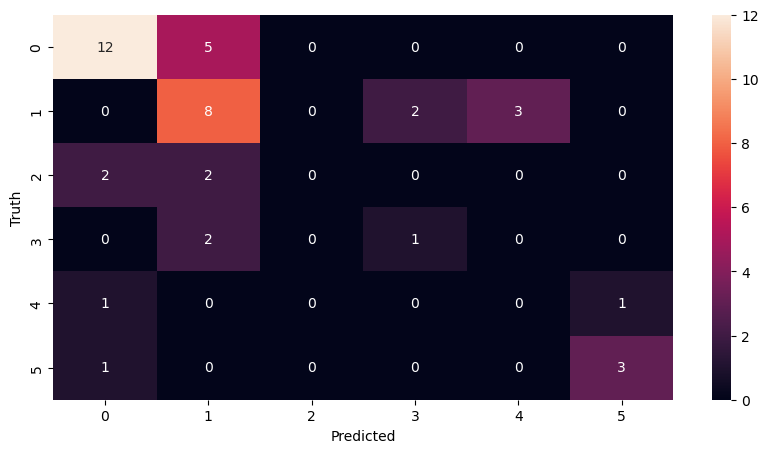

In [91]:
import seaborn as sns 
plt.figure(figsize=(10,5))
sns.heatmap(cfm,annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')